In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_label,test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [4]:
#transform into one-hot code
train_label_onehot=tf.keras.utils.to_categorical(train_label)
test_label_onehot=tf.keras.utils.to_categorical(test_label)

In [5]:
train_label,test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [17]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))# avoid overfit
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # label is one hot
              metrics=['acc']
)

In [21]:
history=model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8890 - acc: 0.6197 - val_loss: 0.7184 - val_acc: 0.7482
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7896 - acc: 0.7086 - val_loss: 0.5900 - val_acc: 0.7876
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6837 - acc: 0.7487 - val_loss: 0.5824 - val_acc: 0.7890
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6179 - acc: 0.7795 - val_loss: 0.5187 - val_acc: 0.8269
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5682 - acc: 0.8004 - val_loss: 0.5122 - val_acc: 0.8176
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5262 - acc: 0.8161 - val_loss: 0.4964 - val_acc: 0.8195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4906 - acc: 0.8331 - val_loss: 0.5089 - val_acc: 0.8347
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [22]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

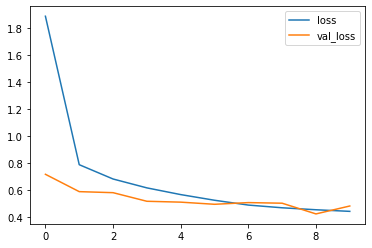

In [23]:
plt.plot(history.epoch,history.history.get("loss"),label='loss')
plt.plot(history.epoch,history.history.get("val_loss"),label='val_loss')
plt.legend()

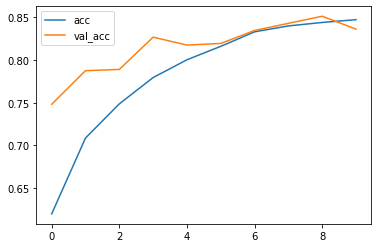

In [24]:
plt.plot(history.epoch,history.history.get("acc"),label='acc')
plt.plot(history.epoch,history.history.get("val_acc"),label='val_acc')
plt.legend()

In [25]:
pre=model.predict(test_image)

In [26]:
pre.shape

(10000, 10)

In [27]:
pre[0]

array([1.2175137e-26, 3.3299198e-27, 1.6153448e-26, 3.0000346e-27,
       1.5853088e-28, 2.4887515e-04, 1.6848286e-24, 2.6901713e-02,
       6.6234816e-13, 9.7284943e-01], dtype=float32)

In [28]:
np.argmax(pre[0])

9

In [29]:
test_label[0]

9

In [30]:
test_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)